**4. Bagging**

Random Forest is a bagging method. Many weak learners - in this case regression trees - are learned and the results are aggregated. No standardization of the features is necessary for this algorithm so we left it out. To speed up the optimization `RandomizedSearchCV()` is used instead of `GridSearchCV()`.

Random Forest v1

In [341]:
# Source: https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 200, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

In [342]:
param_grid_rf_v1 = {'n_estimators': n_estimators,
                    'max_features': max_features,
                    'max_depth': max_depth,
                    'min_samples_split': min_samples_split,
                    'min_samples_leaf': min_samples_leaf}

print(param_grid_rf_v1)

{'n_estimators': [20, 40, 60, 80, 100, 120, 140, 160, 180, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}


*Aggregation by suburbs*

*This step is time consuming and thus set to Raw*

Untransformed
-------------
R2 train: 0.71 / RMSE train 0.15 / MAE train 0.11 / Nobs: 14261
R2 test: 0.67 / RMSE test 0.15 / MAE test 0.12 / Nobs: 4451

Transformed
-----------
R2 train: 0.59 / RMSE train 55.24 / MAE train 32.12 / Nobs: 14261
R2 test: 0.55 / RMSE test 57.24 / MAE test 34.66 / Nobs: 4451



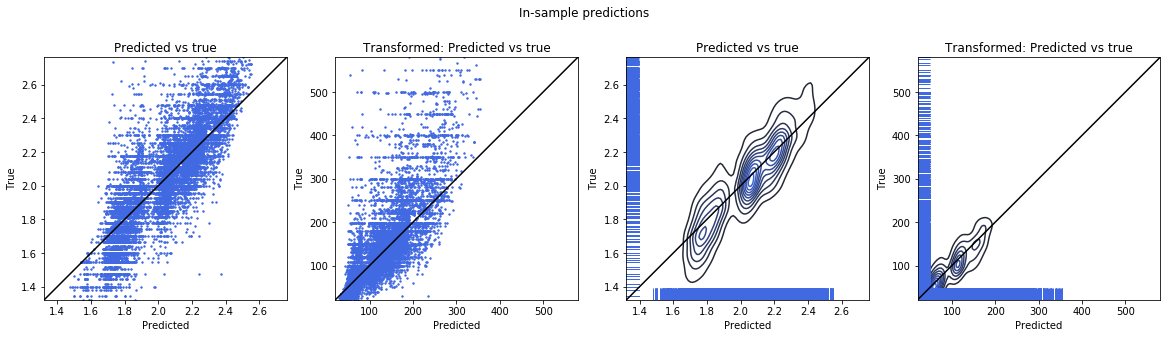

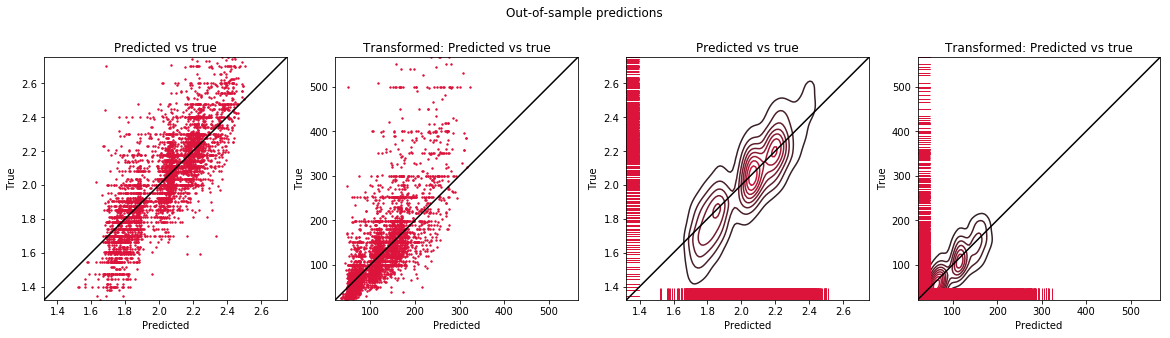

In [343]:
train_tpl = (X_train_suburb, y_train_suburb)
test_tpl = (X_test_suburb, y_test_suburb)
rf_suburb = print_results('RF_suburbs.p', test_tpl, train_tpl, 'both', True)

In [344]:
best_params = rf_suburb['fitted_model'].best_params_
best_params

{'n_estimators': 120,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 10}

Feature importance

In [345]:
names = tuple(np.delete(train_suburb.columns.values, 0))
values = tuple(rf_suburb['fitted_model'].best_estimator_.feature_importances_)

fi_suburb = pd.DataFrame(zip(names,values))
fi_suburb.columns = ('Variable', 'Importance')
fi_suburb

,Variable,Importance
0,Air_log_price_suburb_same_room_type,0.233019
1,Air_calculated_host_listings_count,0.015235
2,Air_bathrooms,0.044644
3,Air_beds,0.077019
4,Air_bedrooms,0.147770
5,Air_accommodates,0.144688
6,Air_extra_people,0.021330
7,Air_guests_included,0.042929
8,Air_distance_to_CBD,0.028742
9,Air_property_type_2_House_Cottage_Villa,0.016916


Hyper-parameter patterns

In [346]:
n_estimators = np.array(rf_suburb['fitted_model'].cv_results_['param_n_estimators'])
max_features = np.array(rf_suburb['fitted_model'].cv_results_['param_max_features'])
max_depth = np.array(rf_suburb['fitted_model'].cv_results_['param_max_depth'])
min_samples_split = np.array(rf_suburb['fitted_model'].cv_results_['param_min_samples_split'])
min_samples_leaf = np.array(rf_suburb['fitted_model'].cv_results_['param_min_samples_leaf'])
mean_test_score = np.array(rf_suburb['fitted_model'].cv_results_['mean_test_score'])

df = pd.DataFrame(data={'n_estimators': n_estimators,
                        'max_features': max_features,
                        'max_depth': max_depth,
                        'min_samples_split': min_samples_split,
                        'min_samples_leaf': min_samples_leaf,
                        'mean_test_score': mean_test_score})
df = df.sort_values(by='mean_test_score', ascending=False)

The `mean_test_score` is the score on the validation test. Since there is no cross validation no mean is actually computed. The scores on the validation set are lower than on the test set.

In [347]:
df.head(10)

,n_estimators,max_features,max_depth,min_samples_split,min_samples_leaf,mean_test_score
42,120,sqrt,10,5,4,0.629192
16,40,sqrt,10,10,1,0.625705
3,100,sqrt,10,5,2,0.624303
36,160,sqrt,None,10,4,0.591857
49,120,sqrt,30,10,4,0.591758
27,160,sqrt,30,5,4,0.590892
25,60,sqrt,110,10,4,0.590569
4,60,sqrt,40,10,4,0.590569
19,180,sqrt,100,2,4,0.590168
15,160,sqrt,40,2,4,0.589283


In [348]:
df.tail(10)

,n_estimators,max_features,max_depth,min_samples_split,min_samples_leaf,mean_test_score
18,180,auto,60,5,1,-0.736671
23,160,auto,50,5,1,-0.745722
12,100,auto,110,5,1,-0.752102
47,120,auto,40,5,2,-0.759208
22,80,auto,50,5,1,-0.762301
33,40,auto,100,5,2,-0.796160
46,20,auto,30,5,1,-0.814335
30,180,auto,None,2,1,-0.814537
7,180,auto,110,2,1,-0.814537
24,60,auto,None,2,1,-0.890496


Random Forest v2

From the output we see that `auto` leads to poor results.

In [349]:
# Source: https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 200, num = 10)]

# Number of features to consider at every split
max_features = ['sqrt', 'log2']

# Maximum number of levels in tree
#max_depth = [int(x) for x in np.linspace(1, 110, num = 11)]
max_depth = [int(x) for x in np.linspace(5, 20, num = 4)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 6, 10]

In [350]:
param_grid_rf_v2 = {'n_estimators': n_estimators,
                    'max_features': max_features,
                    'max_depth': max_depth,
                    'min_samples_split': min_samples_split,
                    'min_samples_leaf': min_samples_leaf}

print(param_grid_rf_v2)

{'n_estimators': [20, 40, 60, 80, 100, 120, 140, 160, 180, 200], 'max_features': ['sqrt', 'log2'], 'max_depth': [5, 10, 15, 20, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4, 6, 10]}


*This step is time consuming and thus set to Raw*

Untransformed
-------------
R2 train: 0.72 / RMSE train 0.14 / MAE train 0.10 / Nobs: 14261
R2 test: 0.67 / RMSE test 0.15 / MAE test 0.12 / Nobs: 4451

Transformed
-----------
R2 train: 0.61 / RMSE train 54.07 / MAE train 31.49 / Nobs: 14261
R2 test: 0.56 / RMSE test 57.01 / MAE test 34.55 / Nobs: 4451



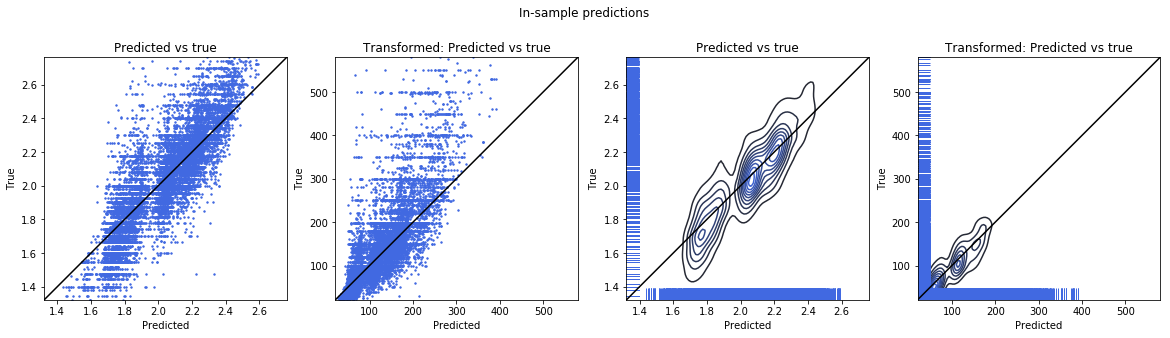

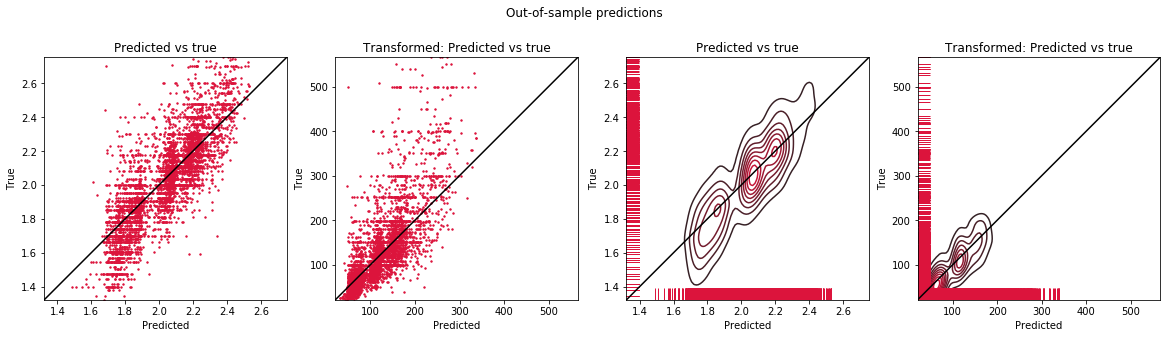

In [351]:
train_tpl = (X_train_suburb, y_train_suburb)
test_tpl = (X_test_suburb, y_test_suburb)
rf_suburb_v2 = print_results('RF_suburbs_v2.p', test_tpl, train_tpl, 'both', True)

In [352]:
best_params = rf_suburb_v2['fitted_model'].best_params_
best_params

{'n_estimators': 120,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 10}

Feature importance

In [353]:
names = tuple(np.delete(train_suburb.columns.values, 0))
values = tuple(rf_suburb_v2['fitted_model'].best_estimator_.feature_importances_)

fi_suburb = pd.DataFrame(zip(names,values))
fi_suburb.columns = ('Variable', 'Importance')
fi_suburb

,Variable,Importance
0,Air_log_price_suburb_same_room_type,0.241896
1,Air_calculated_host_listings_count,0.015393
2,Air_bathrooms,0.043770
3,Air_beds,0.078926
4,Air_bedrooms,0.142347
5,Air_accommodates,0.138603
6,Air_extra_people,0.020929
7,Air_guests_included,0.045600
8,Air_distance_to_CBD,0.029462
9,Air_property_type_2_House_Cottage_Villa,0.016584


Hyper-parameter patterns 

In [354]:
n_estimators = np.array(rf_suburb_v2['fitted_model'].cv_results_['param_n_estimators'])
max_features = np.array(rf_suburb_v2['fitted_model'].cv_results_['param_max_features'])
max_depth = np.array(rf_suburb_v2['fitted_model'].cv_results_['param_max_depth'])
min_samples_split = np.array(rf_suburb_v2['fitted_model'].cv_results_['param_min_samples_split'])
min_samples_leaf = np.array(rf_suburb_v2['fitted_model'].cv_results_['param_min_samples_leaf'])
mean_test_score = np.array(rf_suburb_v2['fitted_model'].cv_results_['mean_test_score'])

df = pd.DataFrame(data={'n_estimators': n_estimators,
                        'max_features': max_features,
                        'max_depth': max_depth,
                        'min_samples_split': min_samples_split,
                        'min_samples_leaf': min_samples_leaf,
                        'mean_test_score': mean_test_score})
df = df.sort_values(by='mean_test_score', ascending=False)

In [355]:
df.head(10)

,n_estimators,max_features,max_depth,min_samples_split,min_samples_leaf,mean_test_score
9,120,sqrt,10,2,2,0.632367
19,100,sqrt,10,10,6,0.628509
41,40,log2,10,10,6,0.627645
3,20,sqrt,10,2,2,0.627554
43,200,log2,10,5,10,0.626010
47,120,log2,15,10,10,0.622606
44,100,log2,15,10,10,0.622228
23,180,log2,15,10,2,0.619132
14,60,sqrt,15,2,6,0.618556
45,160,sqrt,15,2,6,0.618343


In [356]:
df.tail(10)

,n_estimators,max_features,max_depth,min_samples_split,min_samples_leaf,mean_test_score
34,40,log2,5,10,4,0.586147
31,60,log2,5,10,10,0.584609
2,100,sqrt,None,2,4,0.582612
25,200,log2,None,5,2,0.567639
17,140,sqrt,20,10,1,0.552705
40,120,sqrt,20,10,1,0.548198
26,80,sqrt,None,5,2,0.543004
27,60,sqrt,20,10,1,0.536130
46,40,sqrt,None,5,1,0.462435
12,20,sqrt,None,10,1,0.451988


Since the variables are correlated, a multivariate regression is considered to investigate the effect of the different parameters. The fit is better when `max_features` and `min_samples_leaf` are high. However, a lot of variation cannot be explained by the model. The fit is poor.

<!---We see that the score is smaller the larger `min_samples_split` is. As opposed to this, the score seems to be increasing with `min_samples_leaf`. However, the effects are contradicting since higher values in the two variables correspond to a smaller model. Furthermore, a lot of variation cannot be explained by the model.
--->

In [357]:
X = df.loc[:, ['n_estimators', 'max_features', 'max_depth', 'min_samples_split', 'min_samples_leaf']]
X['max_features'] = pd.factorize(X['max_features'])[0]
X['max_depth'] = pd.factorize(X['max_depth'])[0]
#X['n_estimators_sq'] = X['n_estimators']**2
#X['max_features_sq'] = X['max_features']**2
#X['min_samples_split_sq'] = X['min_samples_split']**2
#X['min_samples_leaf_sq'] = X['min_samples_leaf']**2
y = df.loc[:, ['mean_test_score']]
X = sm.add_constant(X)
rf_results = sm.OLS(y, X.astype(float)).fit()
print(rf_results.summary())

                            OLS Regression Results                            
Dep. Variable:        mean_test_score   R-squared:                       0.375
Model:                            OLS   Adj. R-squared:                  0.304
Method:                 Least Squares   F-statistic:                     5.270
Date:                Wed, 08 Jul 2020   Prob (F-statistic):           0.000705
Time:                        19:19:21   Log-Likelihood:                 107.81
No. Observations:                  50   AIC:                            -203.6
Df Residuals:                      44   BIC:                            -192.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.5606      0.01

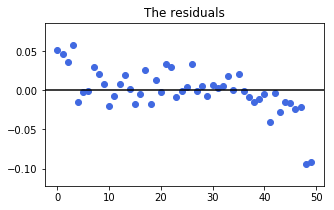

In [358]:
mean = np.mean(rf_results.resid)
fig, ax = plt.subplots(1,1, figsize=(5,3))
ax.scatter(x=range(rf_results.resid.shape[0]), y=rf_results.resid, alpha=1, color=col1)
ax.axhline(mean, color="black")
ax.set_title("The residuals");

*Constructed aggregation - 500m*

`param_grid_rf_v2` is used for hyper-parameter optimization.

*This set is time consuming and thus set to Raw*

Untransformed
-------------
R2 train: 0.80 / RMSE train 0.12 / MAE train 0.09 / Nobs: 13230
R2 test: 0.70 / RMSE test 0.14 / MAE test 0.10 / Nobs: 3739

Transformed
-----------
R2 train: 0.73 / RMSE train 44.96 / MAE train 26.36 / Nobs: 13230
R2 test: 0.60 / RMSE test 54.05 / MAE test 31.85 / Nobs: 3739



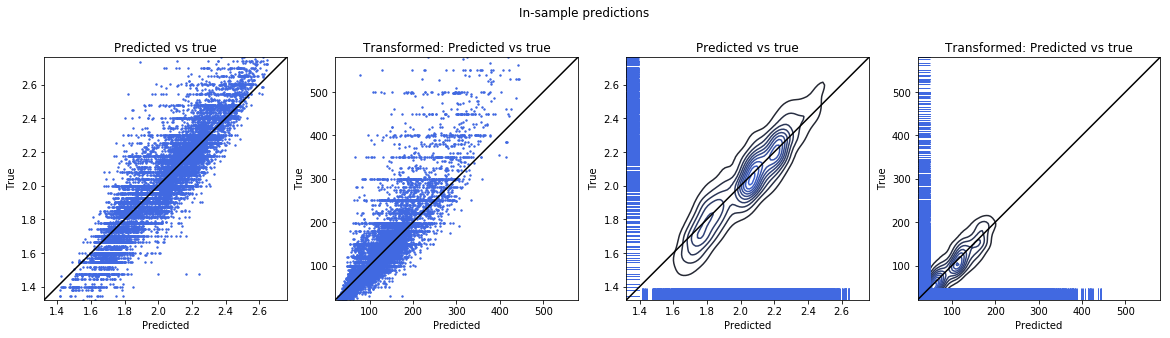

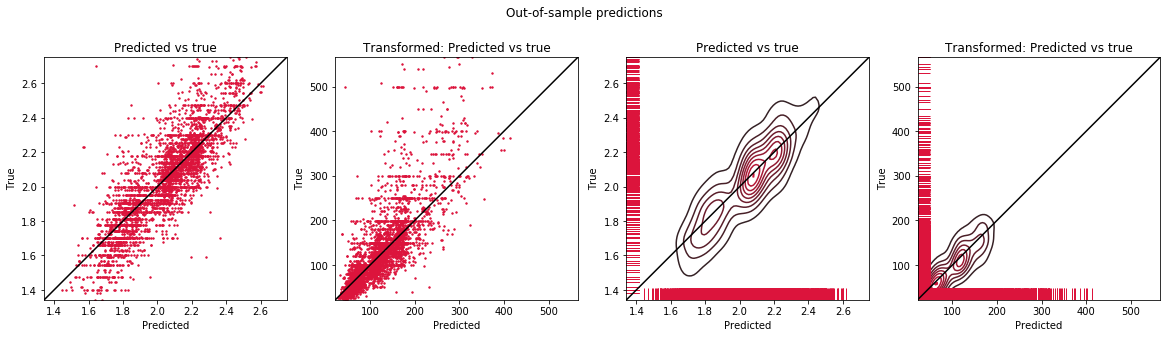

In [359]:
train_tpl = (X_train_500m, y_train_500m)
test_tpl = (X_test_500m, y_test_500m)
rf_500m = print_results('RF_500m.p', test_tpl, train_tpl, 'both', True)

In [360]:
best_params = rf_500m['fitted_model'].best_params_
best_params

{'n_estimators': 120,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 20}

Feature importance

In [361]:
names = tuple(np.delete(train_500m.columns.values, 0))
values = tuple(rf_500m['fitted_model'].best_estimator_.feature_importances_)

fi_500m = pd.DataFrame(zip(names,values))
fi_500m.columns = ('Variable', 'Importance')
fi_500m

,Variable,Importance
0,Air_log_price_500m_same_room_type,0.215327
1,Air_calculated_host_listings_count,0.025822
2,Air_bathrooms,0.046467
3,Air_beds,0.070695
4,Air_bedrooms,0.139753
5,Air_accommodates,0.125851
6,Air_extra_people,0.030904
7,Air_guests_included,0.041669
8,Air_distance_to_CBD,0.051778
9,Air_property_type_2_House_Cottage_Villa,0.017673


*Consructed aggregation - 100m*

`param_grid_rf_v2` is used for hyper-parameter optimization.

*This step is time consuming and thus set to Raw*

Untransformed
-------------
R2 train: 0.80 / RMSE train 0.11 / MAE train 0.08 / Nobs: 9203
R2 test: 0.69 / RMSE test 0.13 / MAE test 0.10 / Nobs: 2177

Transformed
-----------
R2 train: 0.72 / RMSE train 44.20 / MAE train 26.11 / Nobs: 9203
R2 test: 0.60 / RMSE test 49.07 / MAE test 30.12 / Nobs: 2177



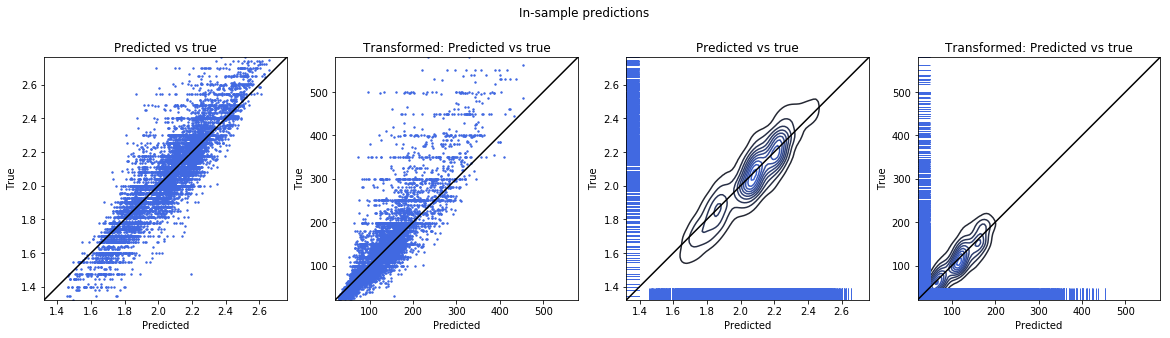

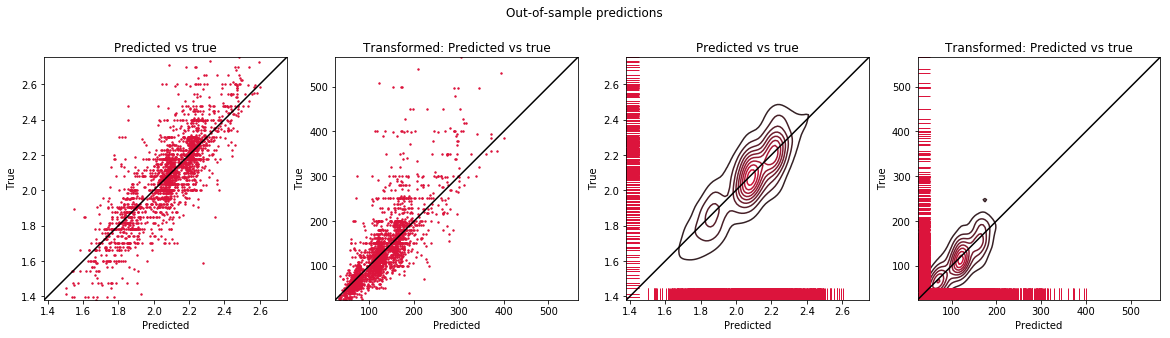

In [362]:
train_tpl = (X_train_100m, y_train_100m)
test_tpl = (X_test_100m, y_test_100m)
rf_100m = print_results('RF_100m.p', test_tpl, train_tpl, 'both', True)

In [363]:
best_params = rf_100m['fitted_model'].best_params_
best_params

{'n_estimators': 140,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 20}

Feature importance

In [364]:
names = tuple(np.delete(train_100m.columns.values, 0))
values = tuple(rf_100m['fitted_model'].best_estimator_.feature_importances_)

fi_100m = pd.DataFrame(zip(names,values))
fi_100m.columns = ('Variable', 'Importance')
fi_100m

,Variable,Importance
0,Air_log_price_100m_same_room_type,0.195930
1,Air_calculated_host_listings_count,0.027431
2,Air_bathrooms,0.049560
3,Air_beds,0.068292
4,Air_bedrooms,0.150884
5,Air_accommodates,0.126911
6,Air_extra_people,0.034544
7,Air_guests_included,0.050526
8,Air_distance_to_CBD,0.051392
9,Air_property_type_2_House_Cottage_Villa,0.016114


*Constructed aggregation - 50m*

`param_grid_rf_v2` is used for hyper-parameter optimization.

*This step is time consuming and thus set to Raw*

Untransformed
-------------
R2 train: 0.79 / RMSE train 0.11 / MAE train 0.08 / Nobs: 6522
R2 test: 0.68 / RMSE test 0.12 / MAE test 0.09 / Nobs: 1340

Transformed
-----------
R2 train: 0.70 / RMSE train 44.13 / MAE train 25.79 / Nobs: 6522
R2 test: 0.59 / RMSE test 46.71 / MAE test 29.16 / Nobs: 1340



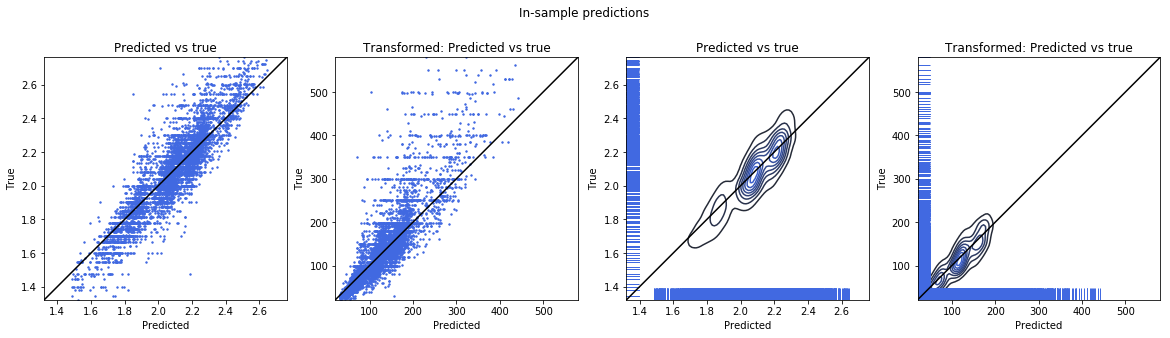

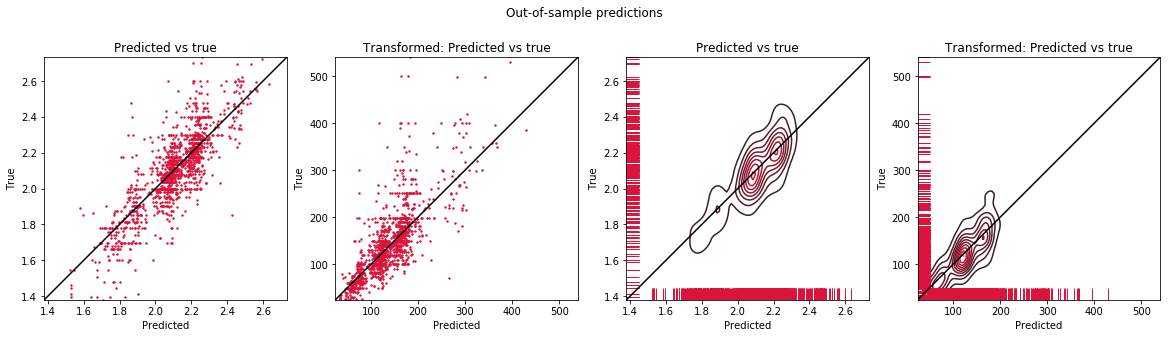

In [365]:
train_tpl = (X_train_50m, y_train_50m)
test_tpl = (X_test_50m, y_test_50m)
rf_50m = print_results('RF_50m.p', test_tpl, train_tpl, 'both', True)

In [366]:
best_params = rf_50m['fitted_model'].best_params_
best_params

{'n_estimators': 120,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 20}

Feature importance

In [367]:
names = tuple(np.delete(train_50m.columns.values, 0))
values = tuple(rf_50m['fitted_model'].best_estimator_.feature_importances_)

fi_50m = pd.DataFrame(zip(names,values))
fi_50m.columns = ('Variable', 'Importance')
fi_50m

,Variable,Importance
0,Air_log_price_50m_same_room_type,0.147638
1,Air_calculated_host_listings_count,0.030989
2,Air_bathrooms,0.050224
3,Air_beds,0.073479
4,Air_bedrooms,0.169894
5,Air_accommodates,0.118003
6,Air_extra_people,0.042272
7,Air_guests_included,0.060633
8,Air_distance_to_CBD,0.052835
9,Air_property_type_2_House_Cottage_Villa,0.017746
